## Q1. What is the mathematical formula for a linear SVM?

f_out =  Wj * xi + b

for correct classification :
    true_value * f_out > 1 

## Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) aims to find the hyperplane that best separates two classes while maximizing the margin between the classes. This involves both maximizing the margin and ensuring that the data points are correctly classified. 

objective function is :
    minimize  =  1/2*(||wi||**2)
    wi, b

for soft max :
    minimize =  1/2*(||wi||**2) + c * sum(eta(i))
    wi, b 

Incorporating Slack Variables for Soft Margin SVM 

In practice, a perfectly separable dataset is rare, so slack variables eta(i) ≥ 0 are introduced to allow some misclassifications. This leads to the soft margin SVM

C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.

## Q3. What is the kernel trick in SVM?

The kernel trick in Support Vector Machines (SVMs) is a technique that allows SVMs to perform classification tasks in a higher-dimensional space without explicitly computing the coordinates of the data in that space. This is achieved by using a kernel function, which computes the dot product of the data points in the higher-dimensional space implicitly. This enables SVMs to handle non-linear decision boundaries.

different type of kernel function is availble like :
    linear
    polynomial 
    RBF(radial bais function)
    sigmoid
    softmax


## Q4. What is the role of support vectors in SVM Explain with example.

Support vectors play a crucial role in Support Vector Machines (SVMs) as they are the data points that are closest to the decision boundary (the hyperplane) and directly influence its position and orientation. These points are essential because they define the maximum margin hyperplane that separates the classes in the feature space. 

Roles of Support Vectors
Defining the Decision Boundary:
The support vectors are the data points that lie closest to the decision boundary. The SVM algorithm aims to find the hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points from either class. These nearest data points are the support vectors.

Maximizing the Margin:
The objective of SVM is to maximize the margin between the support vectors of the two classes. The larger the margin, the better the generalization ability of the classifier. The support vectors are the critical elements of the training set because they are the points that the margin pushes up against.

Robustness to Outliers:
Support vectors make SVM robust to outliers. If a data point is far from the decision boundary, it has no influence on the decision boundary. Only the support vectors matter in defining the hyperplane, making the model less sensitive to noise and outliers in the data.


## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

1. Hyperplane
In SVM, a hyperplane is the decision boundary that separates the classes. In a 2D space, this hyperplane is a line.

2. Marginal Plane
The marginal planes are the parallel planes that pass through the support vectors. The distance between these planes is called the margin.

3. Hard Margin
A hard margin SVM is used when the data is linearly separable, meaning there is a clear boundary with no misclassifications allowed.

4. Soft Margin
A soft margin SVM allows some misclassifications. This is useful when the data is not perfectly separable. The soft margin introduces slack variables to allow for some errors.



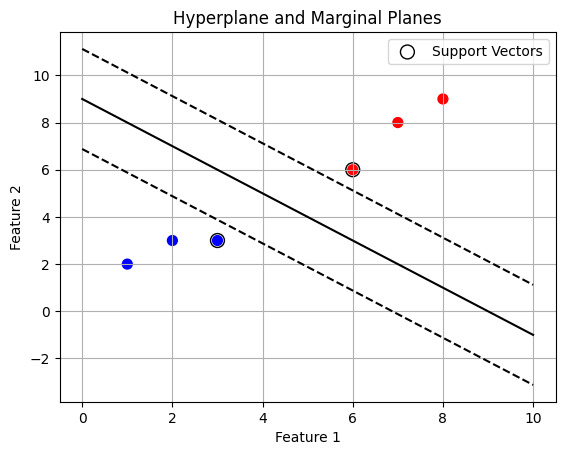

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# Define the data points
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 9]])
y = np.array([0, 0, 0, 1, 1, 1])

# Train the SVM model with a hard margin (C is very large)
model_hard = svm.SVC(kernel='linear', C=1e10)
model_hard.fit(X, y)

# Get the separating hyperplane and marginal planes
w = model_hard.coef_[0]
b = model_hard.intercept_[0]
xx = np.linspace(0, 10)
yy = (-w[0] * xx - b) / w[1]
margin = 1 / np.sqrt(np.sum(model_hard.coef_ ** 2))
yy_margins = [(yy + margin), (yy - margin)]

# Plot the data points and hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_margins[0], 'k--')
plt.plot(xx, yy_margins[1], 'k--')

# Highlight the support vectors
plt.scatter(model_hard.support_vectors_[:, 0], model_hard.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hyperplane and Marginal Planes')
plt.legend()
plt.grid(True)
plt.show()


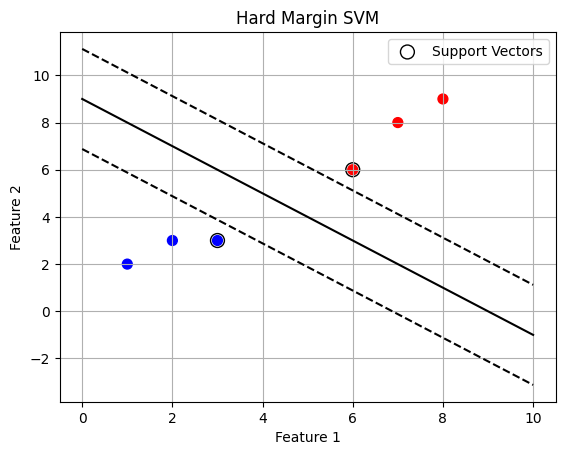

In [43]:
# Train the SVM model with a hard margin (C is very large)
model_hard = svm.SVC(kernel='linear', C=1e10)
model_hard.fit(X, y)

# Get the separating hyperplane and marginal planes
w = model_hard.coef_[0]
b = model_hard.intercept_[0]
xx = np.linspace(0, 10)
yy = (-w[0] * xx - b) / w[1]
margin = 1 / np.sqrt(np.sum(model_hard.coef_ ** 2))
yy_margins = [(yy + margin), (yy - margin)]

# Plot the data points and hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_margins[0], 'k--')
plt.plot(xx, yy_margins[1], 'k--')

# Highlight the support vectors
plt.scatter(model_hard.support_vectors_[:, 0], model_hard.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.legend()
plt.grid(True)
plt.show()


model coeff is :  [[0.08 0.56]]


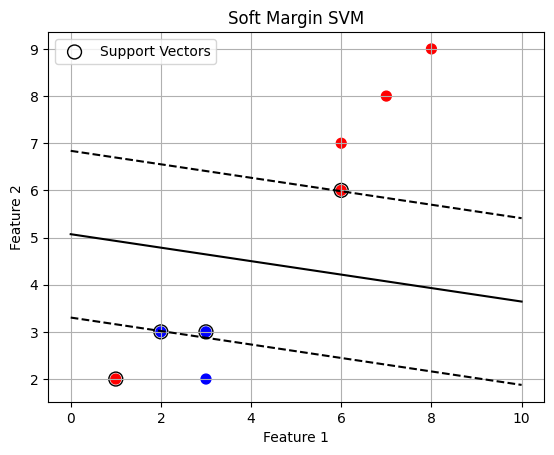

In [57]:
# Add some noise to make the data non-linearly separable
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 9], [3, 2], [6, 7]])
y = np.array([1, 0, 0, 1, 1, 1, 0, 1])

# Train the SVM model with a soft margin (C is small)
model_soft = svm.SVC(kernel='linear', C=1.0)
model_soft.fit(X, y)

print("model coeff is : ",model_soft.coef_)
# Get the separating hyperplane and marginal planes
w = model_soft.coef_[0]
b = model_soft.intercept_[0]
xx = np.linspace(0, 10)
yy = (-w[0] * xx - b) / w[1]
margin = 1 / np.sqrt(np.sum(model_soft.coef_ ** 2))
yy_margins = [(yy + margin), (yy - margin)]

# Plot the data points and hyperplane
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='bwr', s=50)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_margins[0], 'k--')
plt.plot(xx, yy_margins[1], 'k--')

# Highlight the support vectors
plt.scatter(model_soft.support_vectors_[:, 0], model_soft.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM')
plt.legend()
plt.grid(True)
plt.show()


## Q6. SVM Implementation through Iris dataset.
    ~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.
    ~ Train a linear SVM classifier on the training set and predict the labels for the testing set.
    ~ Compute the accuracy of the model on the testing set.
    ~ Plot the decision boundaries of the trained model using two of the features.
    ~ Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["species"],axis=1), df["species"], test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [6]:
svc = SVC()

In [7]:
svc.fit(X_train, y_train)

SVC()

In [8]:
y_hat = svc.predict(X_test)

In [9]:
confusion_matrix(y_test, y_hat)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [10]:
accuracy = accuracy_score(y_test, y_hat)
print("accuracy score is : ", accuracy)

accuracy score is :  1.0


In [11]:
y_predict_train = svc.predict(X_train)

In [12]:
acc = accuracy_score(y_train, y_predict_train)
acc

0.975

In [13]:
## here we already get 100 % accuracy on test data and 97.5 on training data

In [15]:
params = {
    "C": [1, 0.001, 0.01,0.1],
    'kernel' : ["linear", "poly", "rbf", "sigmoid"]
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
svc_ = SVC()

In [18]:
grid = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=1, scoring="accuracy" )
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [20]:
grid.classes_

array([0, 1, 2])

In [21]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [22]:
grid.best_estimator_

SVC(C=1, kernel='linear')

In [23]:
best_model = SVC(C=1, kernel='linear')
best_model

SVC(C=1, kernel='linear')

In [25]:
best_model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [26]:
y_predict = best_model.predict(X_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## model accuracy 

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
print("accuracy of the model is : ",accuracy_score(y_test, y_predict))

accuracy of the model is :  1.0


In [34]:
best_model.coef_

array([[-0.04631136,  0.52105578, -1.0030165 , -0.46411816],
       [-0.00641373,  0.17867392, -0.5389119 , -0.29158729],
       [ 0.56766907,  1.21519237, -2.03626115, -1.70330734]])

In [37]:
best_model.intercept_

array([1.45338269, 1.50537328, 5.8028791 ])

In [41]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [45]:
w_0 = best_model.coef_[0]
w_1 = best_model.coef_[1]
b = best_model.intercept_[0]

In [46]:
w_0, w_1

(array([-0.04631136,  0.52105578, -1.0030165 , -0.46411816]),
 array([-0.00641373,  0.17867392, -0.5389119 , -0.29158729]))

In [47]:
b

1.4533826924303648

In [50]:
w_0

array([-0.04631136,  0.52105578, -1.0030165 , -0.46411816])

In [113]:
xx = np.linspace(0,5,5)
xx = xx.reshape(xx.shape[0],1)

In [114]:
xx.shape

(5, 1)

In [115]:
xx

array([[0.  ],
       [1.25],
       [2.5 ],
       [3.75],
       [5.  ]])

In [116]:
w_0 = w_0.reshape(1,-1)

In [117]:
yy = (xx * w_0 - b)/w_1
yy

array([[-442.79981316,   15.89487705,   -5.26987807,   -9.73979362],
       [-433.77399313,   19.54017529,   -2.94339275,   -7.75017429],
       [-424.7481731 ,   23.18547353,   -0.61690743,   -5.76055497],
       [-415.72235307,   26.83077176,    1.70957789,   -3.77093564],
       [-406.69653304,   30.47607   ,    4.03606321,   -1.78131631]])

In [118]:
margin = 1/(np.sqrt(np.sum(best_model.coef_**2)))
margin

0.30501044326415644

In [119]:
yy_margin = [yy+margin, yy-margin]
yy_margin

[array([[-4.42494803e+02,  1.61998875e+01, -4.96486763e+00,
         -9.43478318e+00],
        [-4.33468983e+02,  1.98451857e+01, -2.63838231e+00,
         -7.44516385e+00],
        [-4.24443163e+02,  2.34904840e+01, -3.11896989e-01,
         -5.45554452e+00],
        [-4.15417343e+02,  2.71357822e+01,  2.01458833e+00,
         -3.46592519e+00],
        [-4.06391523e+02,  3.07810804e+01,  4.34107365e+00,
         -1.47630586e+00]]),
 array([[-443.10482361,   15.58986661,   -5.57488852,  -10.04480407],
        [-434.07900358,   19.23516485,   -3.2484032 ,   -8.05518474],
        [-425.05318355,   22.88046308,   -0.92191788,   -6.06556541],
        [-416.02736351,   26.52576132,    1.40456745,   -4.07594608],
        [-407.00154348,   30.17105956,    3.73105277,   -2.08632675]])]

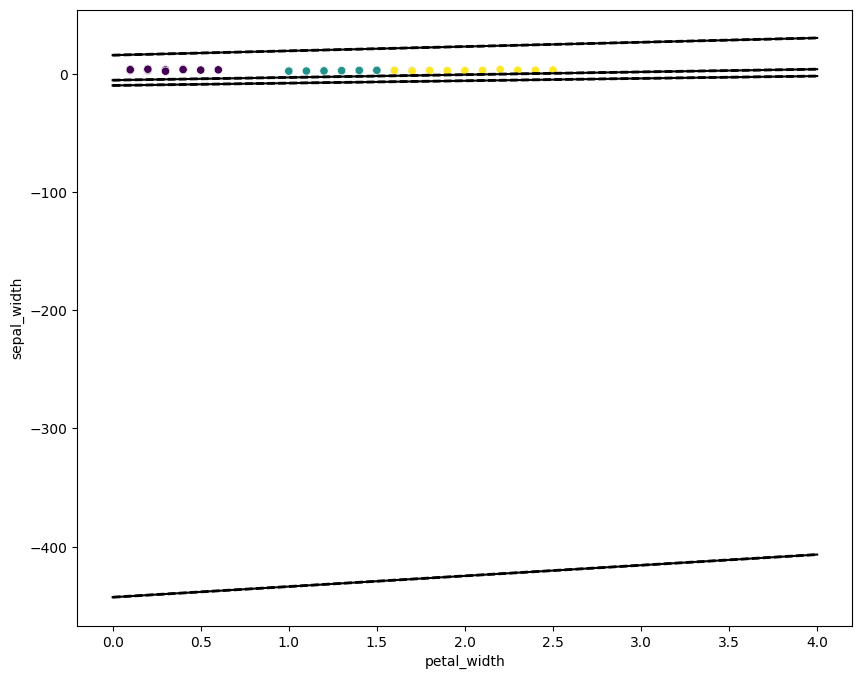

In [124]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= X_train["petal_width"], y=X_train["sepal_width"], c=y_train)
plt.plot(yy,"k-")
plt.plot(yy_margin[0],"k--")
plt.plot(yy_margin[1],"k--")

plt.show()